In [67]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('bollywood_dataset.csv')
df.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,Genre_2,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,Thriller,8,56882.0,58.97,142.99
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,NaN,4.5,3052.0,21.00,19.21
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,NaN,7.6,4856.0,6.00,2.80
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,NaN,4,1315.0,10.00,14.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,NaN,5,287.0,7.00,0.57


In [69]:
data = df.copy()
data = data.drop('Genre_2', axis=1)
data.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,8,56882.0,58.97,142.99
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,4.5,3052.0,21.00,19.21
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,7.6,4856.0,6.00,2.80
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,4,1315.0,10.00,14.00
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,5,287.0,7.00,0.57


In [70]:
data = data[data['Budget_in_crore(INR)'] != 'null']
data = data[data['Worldwide_box_office_gross_in_crore(INR)'] != 'null']

In [71]:
data = data.dropna()

In [72]:
data.tail()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
673,Sooryavanshi,2021.0,November,Rohit Shetty,Akshay Kumar,Katrina Kaif,Action,6.9,74999.0,250.0,298.84
675,83 (2021),2021.0,December,Kabir Khan,Ranveer Singh,Jeeva,Biography,7.7,31683.0,260.0,186.97
680,Chandigarh Kare Aashiqui,2021.0,December,Abhishek Kapoor,Ayushmann Khurrana,Vaani Kapoor,Drama,6.9,12303.0,39.0,38.57
681,Velle,2021.0,December,Deven Munjal,Abhay Deol,Karan Deol,Drama,7.2,4647.0,11.0,0.59
682,Tadap,2021.0,December,Milan Luthria,Ahan Shetty,Tara Sutaria,Action,5.6,4096.0,27.0,34.85


In [73]:
def calculate_verdict(data):
    p_l = (data['Worldwide_box_office_gross_in_crore(INR)']-data['Budget_in_crore(INR)'])/data['Worldwide_box_office_gross_in_crore(INR)']
    data['P/L'] = (p_l*100)
    if p_l >= 0:
        if p_l <=0.2:
            data['Verdict'] = 'Average'
        elif p_l <= 0.4:
            data['Verdict'] = 'Hit'
        elif p_l <= 0.6:
            data['Verdict'] = 'Super-Hit'
        else:
            data['Verdict'] = 'Blockbuster'
    else:
        if p_l >= -0.3:
            data['Verdict'] = 'Flop'
        else:
            data['Verdict'] = 'Disaster'
    return data
data = data.apply(calculate_verdict, axis=1)

In [74]:
data.head()

,Film,Released_Year,Released_month,Director,Cast_1,Cast_2,Genre_1,IMDB_Ratings,IMDB_Users,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR),P/L,Verdict
0,Baby,2015.0,January,Neeraj Pandey,Akshay Kumar,Danny Denzongpa,Action,8,56882.0,58.97,142.99,58.759354,Super-Hit
1,Dolly Ki Doli,2015.0,January,Abhishek Dogra,\tSonam Kapoor,Pulkit Samrat,Comedy,4.5,3052.0,21.00,19.21,-9.318064,Flop
2,Rahasya,2015.0,January,Manish Gupta,Kay Kay Menon,Ashish Vidyarthi,Social,7.6,4856.0,6.00,2.80,-114.285714,Disaster
3,Khamoshiyan,2015.0,January,Karan Darra,\tGurmeet Choudhary,Ali Fazal,Drama,4,1315.0,10.00,14.00,28.571429,Hit
4,Sharafat Gayi Tel Lene,2015.0,January,Gurmmeet Singh,Zayed Khan,Tena Desae,Comedy,5,287.0,7.00,0.57,-1128.070175,Disaster


In [75]:
data[['Budget_in_crore(INR)','Worldwide_box_office_gross_in_crore(INR)']].describe()

,Budget_in_crore(INR),Worldwide_box_office_gross_in_crore(INR)
count,431.000000,431.000000
mean,40.026729,64.468747
std,45.226755,102.110039
min,0.800000,0.020000
25%,12.500000,3.725000
50%,25.000000,22.970000
75%,45.500000,83.935000
max,310.000000,702.480000


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Budget_in_crore(INR)', ylabel='Worldwide_box_office_gross_in_crore(INR)'>

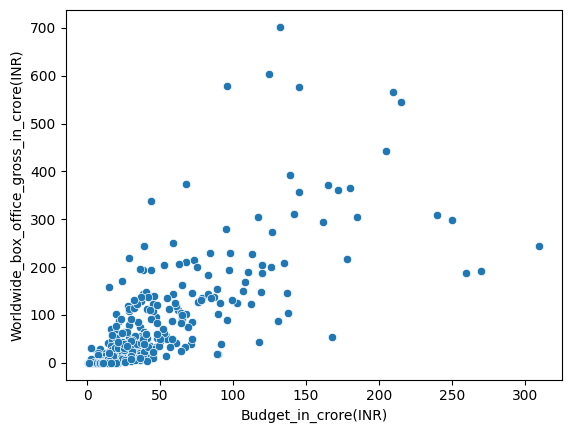

In [77]:
sns.scatterplot(x='Budget_in_crore(INR)', y='Worldwide_box_office_gross_in_crore(INR)', data=data)

In [78]:
data['Genre_1'] = data['Genre_1'].str.strip().str.title()
Genre_count = data.groupby(['Genre_1', 'Verdict']).size().unstack(fill_value=0)
# Then follow with the same Genre_summary steps:
Genre_summary = pd.DataFrame()
Genre_summary['Failures'] = Genre_count['Flop'] + Genre_count['Disaster']
Genre_summary['Successes'] = (Genre_count['Hit'] + 
                              Genre_count['Super-Hit'] + 
                              Genre_count['Average'] + 
                              Genre_count['Blockbuster'])
Genre_summary['Ratio'] = Genre_summary['Successes']/Genre_summary['Failures']
Genre_summary = Genre_summary.sort_values(by='Ratio', ascending=False)
print(Genre_summary)

               Failures  Successes     Ratio
Genre_1                                     
Adventure             0          2       inf
War                   0          1       inf
Biography             7         16  2.285714
Romance               7         11  1.571429
Action               30         39  1.300000
Musical               1          1  1.000000
Sports                2          2  1.000000
History               1          1  1.000000
Horror                7          7  1.000000
Thriller             12         11  0.916667
Comedy               54         43  0.796296
Drama                89         70  0.786517
Social                5          2  0.400000
Crime                 6          1  0.166667
Black Comedy          1          0  0.000000
Psychological         1          0  0.000000
Mystery               1          0  0.000000


In [79]:
year_verdict_table = data.groupby(['Released_Year', 'Verdict']).size().unstack(fill_value=0)
year_verdict_table['Total_Movies'] = year_verdict_table.sum(axis=1)
year_verdict_table = year_verdict_table.sort_index()
print(year_verdict_table)

Verdict        Average  Blockbuster  Disaster  Flop  Hit  Super-Hit  \
Released_Year                                                         
2015.0               7           11        20     5   10          9   
2016.0               7           10        29     8    9          8   
2017.0               6           12        44     3   13          8   
2018.0               7           13        43     3    9          7   
2019.0               7           14        31     3    7          9   
2020.0               2            2        14     4    8          5   
2021.0               2            1        16     1    3          1   

Verdict        Total_Movies  
Released_Year                
2015.0                   62  
2016.0                   71  
2017.0                   86  
2018.0                   82  
2019.0                   71  
2020.0                   35  
2021.0                   24  


In [80]:
festival_months = ['October', 'December', 'January', 'June']
data['Is_Festival_Release'] = data['Released_month'].isin(festival_months)

In [81]:
data['IMDB_Ratings'] = pd.to_numeric(data['IMDB_Ratings'], errors='coerce')
data['Critical_Acclaim'] = (data['IMDB_Ratings'] > 7)

In [ ]:
results = []
actor_names = ['Shahrukh Khan', 'Salman Khan', 'Aamir Khan', 'Hrithik Roshan', 'Akshay Kumar', 'Ranveer Singh', 'Ajay Devgn', 'Ranbir Kapoor', 'Amitabh Bachchan', 'Deepika Padukone']
for actor_name in actor_names:
    actor_data = data[data['Cast_1'] == actor_name]
    total_movies = actor_data.shape[0]
    total_budget = actor_data['Budget_in_crore(INR)'].sum()
    total_collection = actor_data['Worldwide_box_office_gross_in_crore(INR)'].sum()
    roi = ((total_collection - total_budget) / total_budget) * 100 if total_budget > 0 else None
    col_per_movie = total_collection / total_movies if total_movies > 0 else 0
    cric_acclaim_avg = actor_data['IMDB_Ratings'].sum()/total_movies if total_movies > 0 else 0
    results.append({
        'Actor': actor_name,
        'Movies': total_movies,
        'Total_Budget_Cr': round(total_budget,2),
        'Total_Collection_Cr': round(total_collection,2),
        'Collection/Movie_Cr': round(col_per_movie,2),
        'ROI %': round(roi,2),
        'AVG IMDB': round(cric_acclaim_avg,2)
    })
actor_summary = pd.DataFrame(results)
actor_summary = actor_summary.sort_values(by='ROI %', ascending=False)
print(actor_summary)


              Actor  Movies  Total_Budget_Cr  Total_Collection_Cr  \
2        Aamir Khan       2           177.00               825.02   
9  Deepika Padukone       2           265.00               595.72   
1       Salman Khan      10          1536.00              3229.16   
7     Ranbir Kapoor       6           580.00              1130.65   
5     Ranveer Singh       5           692.00              1269.12   
6        Ajay Devgn       8           832.00              1512.54   
4      Akshay Kumar      18          1897.97              3363.82   
3    Hrithik Roshan       4           552.00               906.36   
0     Shahrukh Khan       6           847.00              1310.86   
8  Amitabh Bachchan      11           678.00               952.88   

   Collection/Movie_Cr   ROI %  AVG IMDB  
2               412.51  366.11      8.10  
9               297.86  124.80      6.25  
1               322.92  110.23      4.91  
7               188.44   94.94      5.97  
5               253.82   

<Axes: xlabel='ROI %', ylabel='Actor'>

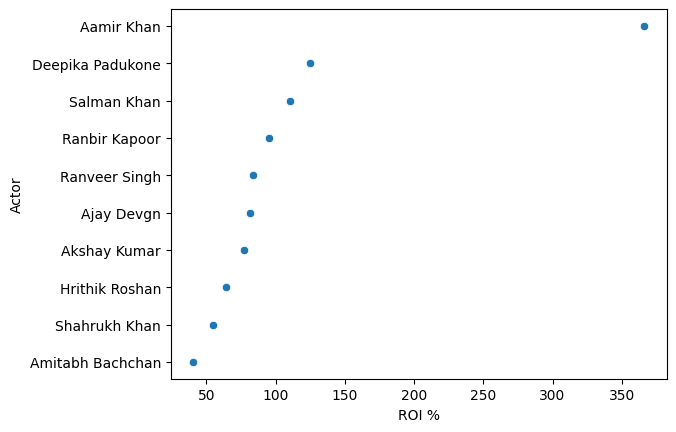

In [83]:
sns.scatterplot(x='ROI %', y='Actor', data=actor_summary)